In [1]:
import numpy as np
from scipy.sparse import linalg as lg
import exact_diagonalization as ed
import utils
import matplotlib.pyplot as plt

In [2]:
n_sites = 4
time_steps = 50
h_init = 1.0
h_ev = 0.5

t = np.linspace(0.0, 1.0, time_steps + 1)
dt = t[1] - t[0]

ham = utils.tfim_hamiltonian(n_sites, h=h_ev)
exact_state, obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev)
Psi_exact = exact_state.ravel()

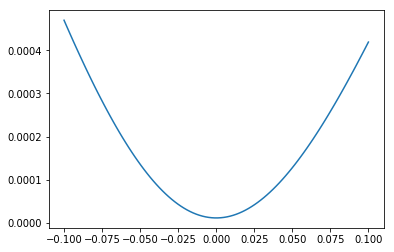

In [3]:
clock = ed.construct_sparse_clock(ham, dt, time_steps)
calculate_clock_ev = lambda Psi: Psi.conj().dot(clock.dot(Psi)) / (np.abs(Psi)**2).sum()
noise = np.linspace(-0.1, 0.1, 100)

clock_evs = np.array([calculate_clock_ev(Psi_exact + ns * np.random.normal(1.0, 1e-3, size=Psi_exact.shape)) 
                      for ns in noise])

plt.plot(noise, clock_evs.real)
plt.show()

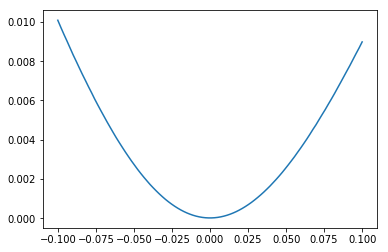

In [4]:
clock = ed.construct_sparse_clock(ham, dt, time_steps, init_penalty=10.0, psi0=exact_state[0])
calculate_clock_ev = lambda Psi: Psi.conj().dot(clock.dot(Psi)) / (np.abs(Psi)**2).sum()
noise = np.linspace(-0.1, 0.1, 100)

clock_evs = np.array([calculate_clock_ev(Psi_exact + ns * np.random.normal(1.0, 1e-3, size=Psi_exact.shape)) 
                      for ns in noise])

plt.plot(noise, clock_evs.real)
plt.show()

In [18]:
clock = ed.construct_sparse_clock(ham, dt, time_steps)
Psi_sol, gminfo = ed.solve_evolution_system(clock, exact_state[0], lg.gmres)
print(gminfo)

Psi_sol = np.concatenate((exact_state[0][np.newaxis] / np.sqrt(time_steps + 1), 
                          Psi_sol.reshape((time_steps, exact_state.shape[1]))), axis=0)
print(Psi_sol.shape)

0
(51, 16)


In [16]:
(np.abs(Psi_sol)**2).sum()

1.958883806177219

In [19]:
utils.overlap(exact_state, Psi_sol)

0.9999495483074702

In [ ]:
clock_penalty = ed.construct_sparse_clock(ham, dt, time_steps)